In [1]:
import pandas as pd
import seaborn as sns

In [2]:
screen_width_pix = 1920
screen_height_pix = 1080

In [3]:
subjects_to_include = "data/subject_files.txt"
resumes_to_include = "data/resume_names.txt"

In [4]:
subjects_data = []  # contains raw eye-tracking data for each subject
times_subjects = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject
times_subjects_norm = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject, normalized
resumes = []   # resume names
subject_files = []


In [5]:
with open(subjects_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        subject_files.append(line.strip())
        
print(subject_files)

['data/subject-0.tsv']


In [6]:
with open(resumes_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        resumes.append(line.strip())
        
print(resumes)

['QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'UNQUALIFIED_PIC_BADSORT_TIAN.PNG', 'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_PIC_BADSORT_RAHUL.PNG', 'QUALIFIED_PIC_GOODSORT_EMILIA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG']


In [7]:
def filter_keys(original_dict, allowed_keys):
    filtered_dict = {key: value for key, value in original_dict.items() if key in allowed_keys}
    return filtered_dict

In [8]:
# pixel coordinates for areas of interest for each resume. coordinates correspond to 1920*1080 resolution

aoi = {
    "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(995,39), (1314,245)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,255), (943,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "hans": {
        "name" : [(605,39), (959,258)],
        "picture" : [(958,39), (1314,258)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(930,39),(1314,248)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(938,39),(1314,248)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(1020,39),(1314,260)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(950,39),(1314,240)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    #test resume
    "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    }
}

aoi = filter_keys(aoi, resumes)

In [9]:
for file in subject_files:
    df = pd.read_csv(file, sep='\t')
    
    #using only required fields
    df = df[['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID', 'FPOGV', 'USER']]
    subjects_data.append(df)


In [10]:
subjects_data[0].head()

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,USER
0,373445,6050.71729,928159262308,0.46483,0.38230,6050.42578,0.29150,4995,1,NaN
1,373446,6050.73340,928159423248,0.46713,0.38329,6050.42578,0.30762,4995,1,START_TRIAL
2,373447,6050.75049,928159592587,0.46906,0.38392,6050.42578,0.32471,4995,1,NaN
3,373448,6050.76562,928159747404,0.47078,0.38407,6050.42578,0.33984,4995,1,FIXATION_CROSS DISPLAYED
4,373449,6050.78174,928159906245,0.47275,0.38428,6050.42578,0.35596,4995,1,NaN


In [11]:
# list of resume names as displayed in the tsv file
#resumes = ['qualified_pic_goodSort_female .png', 'qualified_noPic_ goodSort_female.png', 'UNQUALIFIED_NOPIC_FEMALE_GOODORDER.PNG', 'UNQUALIFIED_PIC_MALE_GOODORDER.PNG']

In [12]:
# find indexes for splitting samples into separate dataframes for each resume
def find_indexes(resumes, df):
    indexes = []
    for resume in resumes:
        start_row = df[df['USER'] == resume + ' DISPLAYED']
        end_row = df[df['USER'] == resume + ' HIDDEN']
        if (len(start_row) == 0 or len(end_row)==0):
            continue
        start_index = start_row.index[0]
        end_index = end_row.index[0]
        indexes.append((start_index, end_index))
    return indexes

In [13]:
# grouping samples into fixations:
# eliminate non valid samples by keeping only those with FPOGV == 1
# group by fixation ID
# take fpogx and fpogy values of last sample in the fixation for fixation position. do the same for fixation duration

def group_samples_into_fixations(resume_data_samples, fixations_df):
    for df in resume_data_samples:
        df = df[df['FPOGV'] == 1]
        df = df.groupby('FPOGID').agg({
        'FPOGX' : 'last',
        'FPOGY' : 'last',
        'FPOGD' : 'last'
    }).reset_index()
        fixations_df.append(df)
    

In [14]:
def normalize_times(times):
    total_time = times.get("total_time_on_resume")
    normalized_data = {}
    
    for key, value in times.items():
        #if key != "total_time_on_resume":
        #    normalized_data[key] = value / total_time
        #else:
        normalized_data[key] = value / total_time  # Keep total_time_on_resume as it is

    return normalized_data

In [15]:
for subject_data in subjects_data:
    
    # data structure to store amount of time spent fixation on each area for each resume

    times = {
        "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "hans": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        # test resume
        "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        }
    }
    
    
    times = filter_keys(times, resumes)
    
    times_normalized = times.copy()
    
    total_time_per_resume = []
    
    resume_data_fixations = []  # list of dataframes. contains fixations data for each resume.
    
    indexes = find_indexes(resumes, subject_data)
    
    #splitting samples into separate dataframes for each resume
    resume_data_samples = []
    
    for i in range(len(indexes)):
        total_time = df.at[indexes[i][1],"TIME"] - df.at[indexes[i][0],"TIME"]
        total_time_per_resume.append(total_time)
        resume_data_samples.append(df.loc[indexes[i][0] : indexes[i][1]])
        
    group_samples_into_fixations(resume_data_samples, resume_data_fixations)
    
    
    # calculation for time spent fixating on each area in each resume

    for i in range(len(resume_data_samples)):
        current_resume = resumes[i]
        areas = aoi[current_resume]
        fixations = resume_data_fixations[i]
        for j in range(len(fixations)):
            fixation = fixations.loc[j]
            fixation_tagged = False
            times[current_resume]['total_time_on_resume'] += fixation['FPOGD']
            times_normalized[current_resume]['total_time_on_resume'] += fixation['FPOGD']
            for area_name, area_coord in areas.items():
                x_pixel = fixation['FPOGX'] * screen_width_pix #1920
                y_pixel = fixation['FPOGY'] * screen_height_pix #1080
                area_start = area_coord[0]
                area_end = area_coord[1]
                
                if (x_pixel > area_start[0] and x_pixel < area_end[0] and
                    y_pixel > area_start[1] and y_pixel < area_end[1]):

                    times[current_resume][area_name] += fixation['FPOGD']
                    times_normalized[current_resume][area_name] += fixation['FPOGD']
                    fixation_tagged = True
                    break
            # if not assigned to any area
            if (fixation_tagged == False):
                times[current_resume]['untagged'] += fixation['FPOGD']
                times_normalized[current_resume]['untagged'] += fixation['FPOGD']
                
        times_normalized[current_resume] = normalize_times(times_normalized[current_resume])
    
    times_subjects.append(times)
    times_subjects_norm.append(times_normalized)

            
            

In [16]:
times_subjects

[{'QUALIFIED_PIC_GOODSORT_EMILIA.PNG': {'name': 0,
   'picture': 1.3916000000000002,
   'experience': 5.95312,
   'languages': 3.1709,
   'education': 7.085940000000001,
   'skills': 1.64942,
   'hobbies': 1.16406,
   'soft_skills': 1.55274,
   'untagged': 0,
   'total_time_on_resume': 21.96778},
  'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG': {'name': 1.06738,
   'picture': 0,
   'experience': 10.417019999999997,
   'languages': 3.55858,
   'education': 2.16798,
   'skills': 2.3945399999999997,
   'hobbies': 1.8125000000000002,
   'soft_skills': 2.52248,
   'untagged': 0,
   'total_time_on_resume': 23.94048000000001},
  'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG': {'name': 0.77734,
   'picture': 0,
   'experience': 5.918939999999999,
   'languages': 0.61426,
   'education': 0,
   'skills': 6.340820000000001,
   'hobbies': 0.71192,
   'soft_skills': 0,
   'untagged': 7.732419999999999,
   'total_time_on_resume': 22.095700000000004},
  'UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG': {'name': 1.7793,
   'pict

In [17]:
times_subjects_norm

[{'QUALIFIED_PIC_GOODSORT_EMILIA.PNG': {'name': 0.0,
   'picture': 0.06334732048481914,
   'experience': 0.27099324556236454,
   'languages': 0.14434321538180006,
   'education': 0.32256058645889574,
   'skills': 0.07508359970830007,
   'hobbies': 0.05298942360129244,
   'soft_skills': 0.07068260880252807,
   'untagged': 0.0,
   'total_time_on_resume': 1.0},
  'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG': {'name': 0.04458473681396528,
   'picture': 0.0,
   'experience': 0.435121601571898,
   'languages': 0.14864280081268205,
   'education': 0.09055708156227439,
   'skills': 0.1000205509663966,
   'hobbies': 0.07570859063811583,
   'soft_skills': 0.10536463763466725,
   'untagged': 0.0,
   'total_time_on_resume': 1.0},
  'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG': {'name': 0.035180600750372236,
   'picture': 0.0,
   'experience': 0.2678774603203337,
   'languages': 0.027799979181469692,
   'education': 0.0,
   'skills': 0.2869707680679951,
   'hobbies': 0.032219843679992026,
   'soft_skills': 0.0,
 

In [18]:
def contains_picture(key):
    if 'NOPIC' in key:
        return False
    
    
    return True

In [19]:
def mean_block_times(block_times, num_of_resumes):
    mean_block_times = {}
    print(num_of_resumes)
    
    for key, value in block_times.items():
        mean_block_times[key] = value / num_of_resumes
        
    return mean_block_times

In [20]:
def processing_times(times_subjects, y_axis_label):
    block_times_resumes_with_pic = []
    block_times_resumes_without_pic = []
    
    for subject_resumes in times_subjects:
        resume_names = subject_resumes.keys()
    
        for resume_name in resume_names:
            if contains_picture(resume_name):
                block_times_resumes_with_pic.append(subject_resumes[resume_name])
            else:
                block_times_resumes_without_pic.append(subject_resumes[resume_name])
            
    block_times_with_pic = {}
    block_times_without_pic = {}

    for resume_times in block_times_resumes_with_pic:
        for key, value in resume_times.items():
            if key in block_times_with_pic:
                block_times_with_pic[key] += value
            else:
                block_times_with_pic[key] = value

    for resume in block_times_resumes_without_pic:
        for key, value in resume.items():
            if key in block_times_without_pic:
                block_times_without_pic[key] += value
            else:
                block_times_without_pic[key] = value
                
    mean_scaled_block_duration_pic = mean_block_times(block_times_with_pic, len(block_times_resumes_with_pic)) 
    mean_scaled_block_duration_nopic = mean_block_times(block_times_without_pic, len(block_times_resumes_without_pic)) 
                
    blocks = []
    relative_times = []
    pictures = []

    for key, value in mean_scaled_block_duration_pic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("Yes")  

    for key, value in mean_scaled_block_duration_nopic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("No")

    df = pd.DataFrame({
        'block': blocks,
        'relative_time': relative_times,
        'picture': pictures
    })


    #df['picture'] = df['picture'].astype(str)
    print(df)
    
    df = df[df['block'] != 'total_time_on_resume']
    print(df)
    
    
    sns.set_theme(style="whitegrid")

    g = sns.catplot(
        data=df, kind="bar",
        x="block", y="relative_time", hue="picture", aspect = 2)

    g.set_axis_labels("Blocks", y_axis_label)
  


5
6
                   block  relative_time picture
0                   name       0.892776     Yes
1                picture       0.278320     Yes
2             experience      11.587884     Yes
3              languages       3.235352     Yes
4              education       9.808200     Yes
5                 skills       2.775000     Yes
6                hobbies       2.905472     Yes
7            soft_skills       2.652540     Yes
8               untagged       0.530472     Yes
9   total_time_on_resume      34.666016     Yes
10                  name       1.259522      No
11               picture       0.000000      No
12            experience      11.093348      No
13             languages       2.986815      No
14             education       2.873783      No
15                skills       3.666345      No
16               hobbies       1.482750      No
17           soft_skills       3.043213      No
18              untagged       1.806317      No
19  total_time_on_resume      28.212

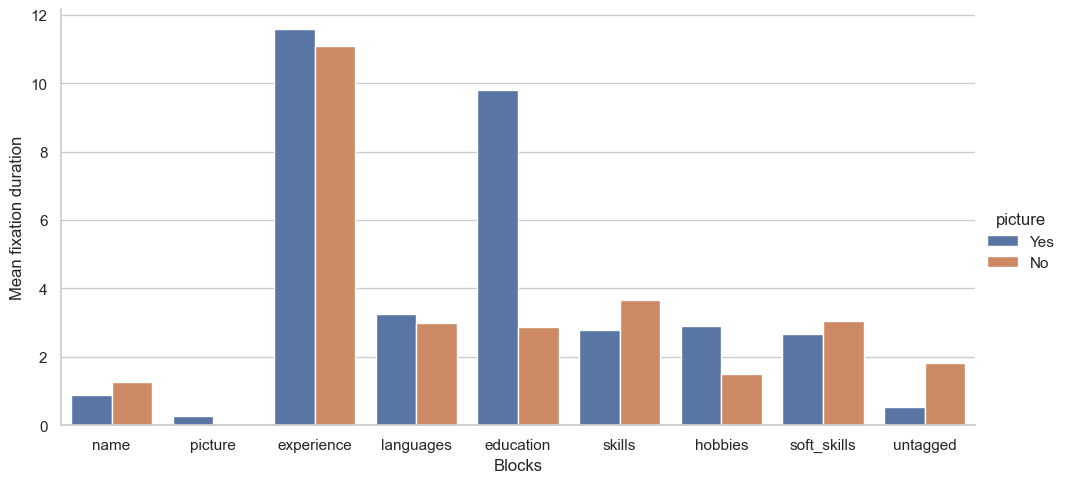

In [21]:
processing_times(times_subjects, "Mean fixation duration")

5
6
                   block  relative_time picture
0                   name       0.017694     Yes
1                picture       0.012669     Yes
2             experience       0.337339     Yes
3              languages       0.106357     Yes
4              education       0.287461     Yes
5                 skills       0.095892     Yes
6                hobbies       0.068719     Yes
7            soft_skills       0.062522     Yes
8               untagged       0.011345     Yes
9   total_time_on_resume       1.000000     Yes
10                  name       0.050627      No
11               picture       0.000000      No
12            experience       0.375074      No
13             languages       0.092107      No
14             education       0.095723      No
15                skills       0.144478      No
16               hobbies       0.069795      No
17           soft_skills       0.099964      No
18              untagged       0.072233      No
19  total_time_on_resume       1.000

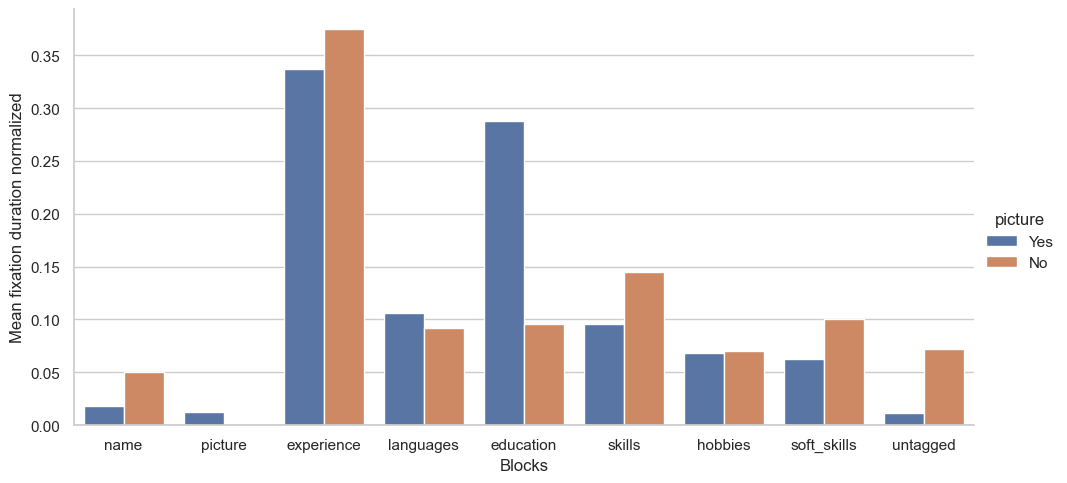

In [22]:
processing_times(times_subjects_norm, "Mean fixation duration normalized")

In [23]:
# block_times_resumes_with_pic = []
# block_times_resumes_without_pic = []

In [24]:
# for subject_resumes in times_subjects:
#     resume_names = subject_resumes.keys()
    
#     for resume_name in resume_names:
#         if contains_picture(resume_name):
#             block_times_resumes_with_pic.append(subject_resumes[resume_name])
#         else:
#             block_times_resumes_without_pic.append(subject_resumes[resume_name])


In [25]:
# block_times_resumes_with_pic

In [26]:
# block_times_resumes_without_pic

In [27]:
# block_times_with_pic = {}
# block_times_without_pic = {}

# for resume_times in block_times_resumes_with_pic:
#     for key, value in resume_times.items():
#         if key in block_times_with_pic:
#             block_times_with_pic[key] += value
#         else:
#             block_times_with_pic[key] = value
            
# for resume in block_times_resumes_without_pic:
#     for key, value in resume.items():
#         if key in block_times_without_pic:
#             block_times_without_pic[key] += value
#         else:
#             block_times_without_pic[key] = value

In [28]:
# block_times_with_pic

In [29]:
# block_times_without_pic

In [30]:
# def mean_block_times(block_times, num_of_resumes):
#     mean_block_times = {}
#     print(num_of_resumes)
    
#     for key, value in block_times.items():
#         mean_block_times[key] = value / num_of_resumes
        
#     return mean_block_times

In [31]:
# mean_scaled_block_duration_pic = mean_block_times(block_times_with_pic, len(block_times_resumes_with_pic)) 
# mean_scaled_block_duration_nopic = mean_block_times(block_times_without_pic, len(block_times_resumes_without_pic)) 

In [32]:
# blocks = []
# relative_times = []
# pictures = []

# for key, value in mean_scaled_block_duration_pic.items():
#     blocks.append(key)
#     relative_times.append(value)
#     pictures.append("Yes")  

# for key, value in mean_scaled_block_duration_nopic.items():
#     blocks.append(key)
#     relative_times.append(value)
#     pictures.append("No")

# df = pd.DataFrame({
#     'block': blocks,
#     'relative_time': relative_times,
#     'picture': pictures
# })


# #df['picture'] = df['picture'].astype(str)
# print(df)

In [33]:
# df = df[df['block'] != 'total_time_on_resume']
# print(df)

In [34]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# g = sns.catplot(
#     data=df, kind="bar",
#     x="block", y="relative_time", hue="picture", aspect = 2)
    
# g.set_axis_labels("Blocks", "Mean fixation duration normalized")
  